### importing Modules

In [1]:
import pandas as pd              #import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Loding The Dataset

In [2]:
train_df=pd.read_csv('train.csv')
                                       #load file bigdata train and test from github 
test_df=pd.read_csv('test.csv') 

In [3]:
train_df.info() 
# Data type of attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
train_df.dtypes 

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
# check unique values of dataset
train_df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [6]:
train_df.describe()
#Statastical info

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Preprocessing the Dataset

In [7]:
# Checking the table has missing values 
#item weight has 1463 and Outer size has 2410 missing values 
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
num_features = train_df.select_dtypes(include=[np.number])
num_features.dtypes # we can see that out of 12 we have only 5 numeric variables.

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [9]:
# check for categorical attributes
cat_col=[]
for x in train_df.dtypes.index:
    if train_df.dtypes[x]== 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [10]:
cat_col.remove('Item_Identifier')
cat_col.remove("Outlet_Identifier")
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [11]:
#print the categorical columns
for col in cat_col:
    print(col)
    print(train_df[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [12]:
# fill the missing values
item_weight_mean=train_df.pivot_table(values="Item_Weight",index='Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [13]:
miss_bool=train_df['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [14]:
for i,  item in enumerate(train_df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            train_df['Item_Weight'][i]=item_weight_mean.loc[item]['Item_Weight']
        else:
            train_df['Item_Weight'][i]=np.mean(train_df['Item_Weight'])

In [15]:
train_df["Item_Weight"].isnull().sum() #filling missing values by mean

0

In [16]:
# fill the missing values
outlet_size_mode=train_df.pivot_table(values="Outlet_Size",columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [17]:
miss_bool=train_df['Outlet_Size'].isnull()
train_df.loc[miss_bool,'Outlet_Size']=train_df.loc[miss_bool,'Outlet_Type'].apply(lambda x:outlet_size_mode[x])

In [18]:
train_df["Outlet_Size"].isnull().sum()

0

In [19]:
df=train_df

In [20]:
sum(df['Item_Visibility']==0)

526

In [21]:
#replace zeroes with mean
df.loc[:,'Item_Visibility'].replace([0],[df['Item_Visibility'].mean()],inplace=True)

In [22]:
sum(df['Item_Visibility']==0)

0

In [23]:
#combine item fat content
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [24]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Creation of New Attributes 

In [25]:
df['New_Item_Type']=df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [26]:
df['New_Item_Type']=df['New_Item_Type'].map({"FD":"Food","NC":"Non-Consumable",'DR':'Drinks'})
df['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [27]:
df.loc[df['New_Item_Type']=='Non-Consumable','Item_Fat_Content']='Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [28]:
# Create small value for establishment year.
df['Outlet_Years']=2013 - df['Outlet_Establishment_Year']

In [29]:
df['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64


### Exploratory Data analysis(EDA)

In [30]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

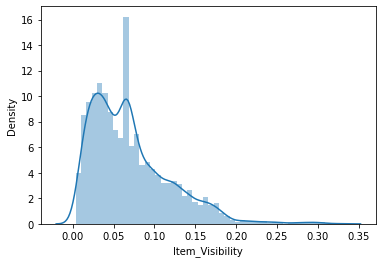

In [31]:
sns.distplot(df['Item_Visibility'])

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

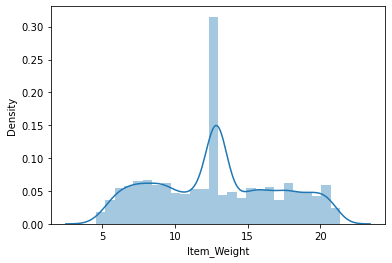

In [32]:
sns.distplot(df['Item_Weight'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

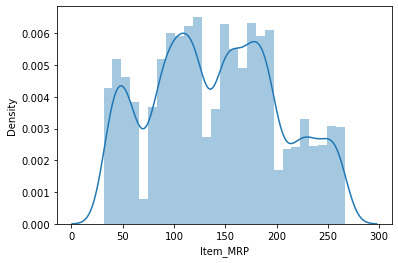

In [33]:
sns.distplot(df['Item_MRP'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

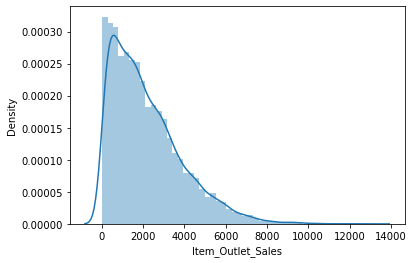

In [34]:
sns.distplot(df['Item_Outlet_Sales'])

In [35]:
#log trasformation 
df['Item_Outlet_Sales']=np.log(1+df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

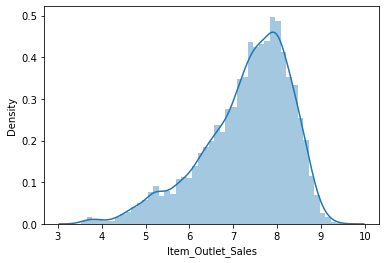

In [36]:
sns.distplot(df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

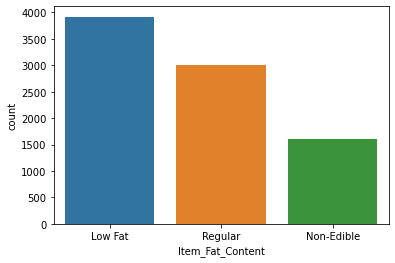

In [37]:
sns.countplot(df['Item_Fat_Content'])

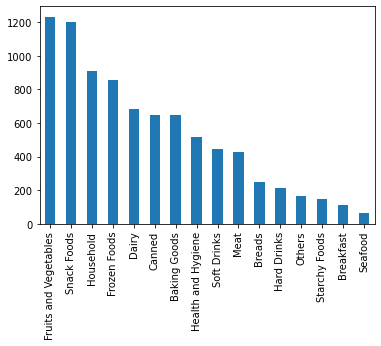

In [38]:
df.Item_Type.value_counts().plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

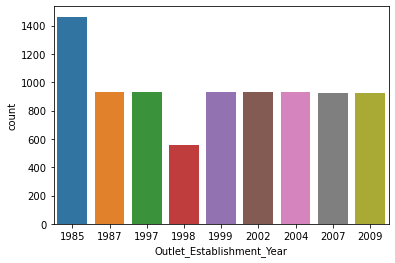

In [39]:
sns.countplot(df['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

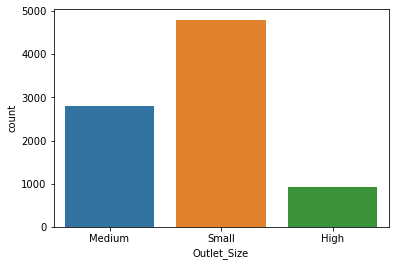

In [40]:
sns.countplot(df['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

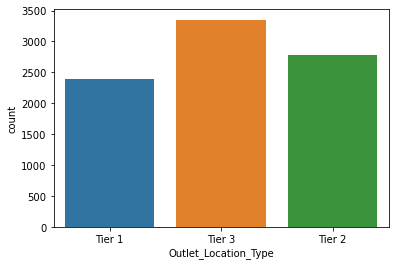

In [41]:
sns.countplot(df['Outlet_Location_Type'])

<AxesSubplot:>

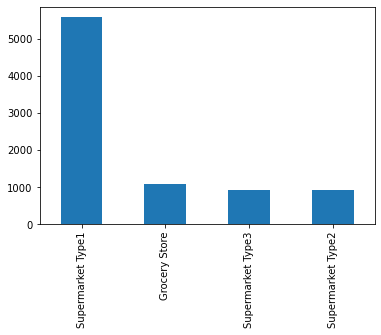

In [42]:
df.Outlet_Type.value_counts().plot(kind='bar')

### Correlation Matrix

<AxesSubplot:>

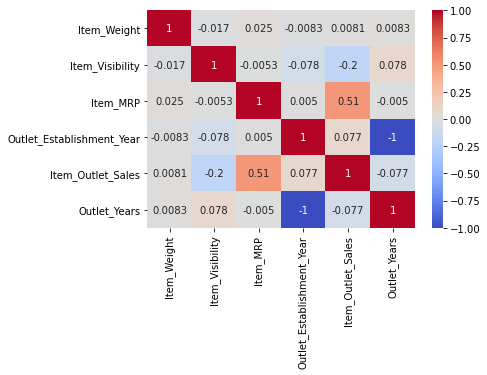

In [43]:
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

### Label Encoding

In [44]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Outlet']=le.fit_transform(df['Outlet_Identifier'])
cat_col=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type']
for col in cat_col:
    df[col]=le.fit_transform(df[col])

### OneHot Encoding

In [45]:
df=pd.get_dummies(df,columns=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type'])
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,Item_Fat_Content_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,8.225808,14,9,1,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,6.096776,4,3,0,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,7.648868,14,9,1,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,182.0950,OUT010,1998,6.597664,15,0,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,53.8614,OUT013,1987,6.903451,26,1,0,...,0,0,1,0,1,0,0,0,0,1


### Input Split

In [46]:
x=df.drop(columns=['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])
y=df['Item_Outlet_Sales']

### Model Training

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model,x,y):
    #train the model
    model.fit(x,y)
    
    #predict the training set
    pred=model.predict(x)
    
    #perform cross-validation 
    cv_score=cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv=5)
    cv_score=np.abs(np.mean(cv_score))
    print('Model Report')
    print('MSE:',mean_squared_error(y,pred))
    print("CV Score :", cv_score)

### Regression

Model Report
MSE: 0.2872113835665447
CV Score : 0.2896791837593472


<AxesSubplot:title={'center':'Model coefficients'}>

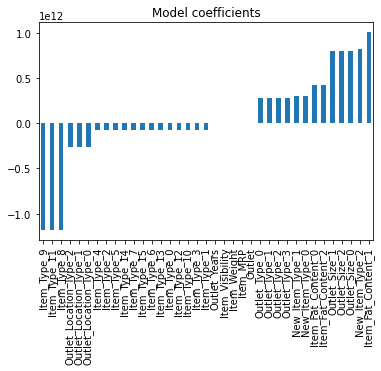

In [48]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
model=LinearRegression(normalize=True)
train(model,x,y)
coef=pd.Series(model.coef_,x.columns).sort_values()
coef.plot(kind='bar',title= "Model coefficients")

Model Report
MSE: 0.42764381895387127
CV Score : 0.42924750578037135


<AxesSubplot:title={'center':'Model coefficients'}>

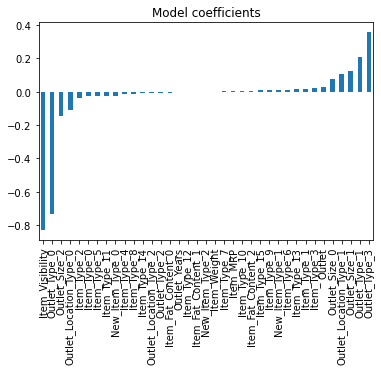

In [49]:
model=Ridge(normalize=True)
train(model,x,y)
coef=pd.Series(model.coef_,x.columns).sort_values()
coef.plot(kind='bar',title= "Model coefficients")

Model Report
MSE: 1.0305333080087593
CV Score : 1.030781898345697


<AxesSubplot:title={'center':'Model coefficients'}>

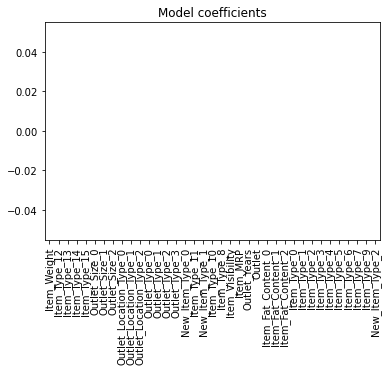

In [50]:
model=Lasso(normalize=True)
train(model,x,y)
coef=pd.Series(model.coef_,x.columns).sort_values()
coef.plot(kind='bar',title= "Model coefficients")

Model Report
MSE: 2.7767015319289398e-34
CV Score : 0.5790954984305727


<AxesSubplot:title={'center':'Future Importance'}>

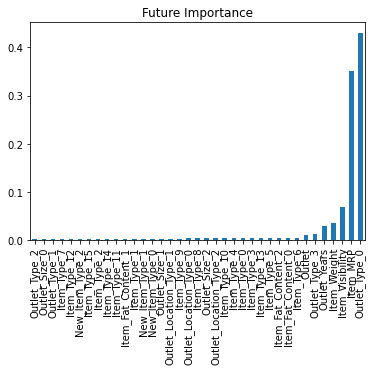

In [51]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
train(model,x,y)
coef=pd.Series(model.feature_importances_,x.columns).sort_values()
coef.plot(kind='bar',title= "Future Importance")

In [52]:
from sklearn.model_selection import train_test_split # import libraries for model devloping .
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [53]:
print(x.shape,x_train.shape,x_test.shape)
print(y.shape,y_train.shape,y_test.shape)

(8523, 37) (5710, 37) (2813, 37)
(8523,) (5710,) (2813,)


In [62]:
from sklearn.ensemble import AdaBoostRegressor
#x, y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(x, y)
AdaBoostRegressor(n_estimators=100, random_state=0)
regr.score(x, y)

0.6699207688221258

### Hyperparameter Tuning:GRidSearch CV

In [63]:
from sklearn.model_selection import GridSearchCV
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,1]}
model=Lasso()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x,y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 1]})
0.718720743899387
0.001
{'alpha': 0.001}


In [64]:
#try to minimize the coefficient variance
from sklearn.linear_model import Lasso,Ridge   # Best Model score 
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.7174949144551803

### Conclusion

In [65]:
#The predict the total Item_outlet_Sales 
pred=ls.predict(x_test)
print("Predict Result sales",pred)
print("Actual Sales",y_test)

Predict Result sales [6.94614271 6.72834029 6.7534077  ... 7.91586695 7.99680973 6.59531914]
Actual Sales 7503    7.463974
2957    5.880166
7031    5.936239
1084    8.662069
856     7.765540
          ...   
2418    7.373747
5412    8.217936
6463    7.138361
3805    7.688681
1580    5.770144
Name: Item_Outlet_Sales, Length: 2813, dtype: float64


In [66]:
score=cross_val_score(ls,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.72108825 0.70962232 0.70809239 0.71445928 0.73967949]
0.7185883454855045
0.011477714309249524


### Saving Best Model

In [67]:
import pickle
filename='Big DataMart '
pickle.dump(ls,open(filename,'wb'))